# Player evaluation

Here we compare players based on their adjusted points. Also, we calculate some useful metrics using the adjusted points to further evaluate player performance in FPL.

In [1]:
# recent gameweek
gameweek = 7

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('max_columns',100)

In [3]:
# fetch FPL data
filepath = '../data/fpl/data_week' + str(gameweek) + '.csv'
df = pd.read_csv(filepath, index_col=0)

# fetch team data
filepath = '../data/fbref/team_stats_week' + str(gameweek) + '.csv'
teamStats = pd.read_csv(filepath, index_col=0)

# fetch player stats data
filepath = '../data/fbref/player_stats_week' + str(gameweek) + '.csv'
playerStats = pd.read_csv(filepath, index_col=0, skiprows=1)

## Value and value points

Here we calculate two interesting metrics: 'value' and 'value points'. 

Value is simply adjusted points per game divided by the cost of the player. Essentially, this measures how many 'points per pound(/euro/whatever)' has the player gained on an average game week. 

The value points is calculated as the geometric mean of a players adjusted points per game and value. Essentially, in FPL we want to gain the maximum possible amount of points. However, we are restrained by a limited budget, so that in practice we cannot just pick all the best players. Then, we would like to have a squad of players that give the most points given our budget. Thus, we would like to pick players that have high value ('bang for buck'). However, often the players with highest value are very cheap players who somewhat overperform relative to their price. Picking a squad full of these players might leave a part of our budget unused. Calculating the geometric mean of adjusted points and value allows us to weigh both aspects equally, i.e. we want players that both gain a lot of points but also have good value. For example, this metric values equally two players, where one has twice the points per game of the other who in turn has twice the value of the other.

In [4]:
# value = expected points / cost
df['value'] = df['adjusted points per game'] / (df['now_cost'] / 10.0)
# geometric mean of 'adjusted points per game' and 'value'
df['valuePoints metric'] = np.sqrt(df['adjusted points per game'] * df['value'])

In [5]:
df['xG+xA'] = df['xG'] + df['xA']
df['xG+xA per game'] = df['xG+xA'] / df['games played']

In [6]:
goalkeepers = df['element_type'] == 1
defenders = df['element_type'] == 2
midfielders = df['element_type'] == 3
forwards = df['element_type'] == 4

#minGames = df['games played'] >= 0

## Player evaluation

Below we compile lists for each position sorting players based on a given metric.

Notice that 'next1_xP' is currently based on preseason expectations on average player performance!

In [7]:
metric = 'valuePoints metric'
#metric = 'adjusted points per game'
#metric = 'next1_xP'

numberToShow = 40

print('GOALKEEPERS')
display(df[goalkeepers ].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP', 'valuePoints metric']].head(20))
print('DEFENDERS')
display(df[defenders ].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('MIDFIELDERS')
display(df[midfielders ].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('FORWARDS')
display(df[forwards ].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))

GOALKEEPERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
597,Sánchez,Brighton,45,1.000000,1,5.950642,1.0,5.950642,NaN,5.483400,2.805160
325,Darlow,Newcastle Utd,50,7.021277,33,35.541043,4.7,5.061906,6.100818,5.225388,2.263753
12,Martínez,Aston Villa,48,5.964912,34,28.185382,5.7,4.725196,3.937227,4.904622,2.156747
217,Schmeichel,Leicester City,55,7.000000,28,29.590528,4.0,4.227218,4.683477,4.207477,1.802492
252,Alisson,Liverpool,59,5.000000,21,21.861984,4.2,4.372397,3.592859,4.403300,1.800087
431,Fabianski,West Ham,50,7.027027,26,27.092834,3.7,3.855519,4.829414,3.889447,1.724240
96,Pope,Burnley,54,6.060606,20,24.069602,3.3,3.971484,4.574974,4.011245,1.709055
8,Leno,Arsenal,50,7.027027,26,26.711374,3.7,3.801234,4.325702,3.714365,1.699964
483,Ramsdale,Sheffield Utd,49,6.923077,18,25.128839,2.6,3.629721,4.152958,3.736217,1.639741


DEFENDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
563,Ait Nouri,Wolves,50,1.000000,15,7.009785,15.0,7.009785,7.795247,6.648383,3.134871
389,Aurier,Tottenham,52,2.000000,13,12.540023,6.5,6.270011,6.081085,6.548879,2.749582
470,Kilman,Wolves,43,4.027778,29,22.067071,7.2,5.478721,6.242049,5.142492,2.642074
277,Cancelo,Manchester City,54,3.000000,21,17.563844,7.0,5.854615,6.782347,5.739682,2.519425
280,Laporte,Manchester City,60,2.000000,10,10.250049,5.0,5.125025,5.516854,5.010092,2.092283
232,Chilwell,Chelsea,59,4.024390,33,19.226032,8.2,4.777378,5.855511,4.727524,1.966815
435,Cresswell,West Ham,51,6.956522,32,30.867912,4.6,4.437262,5.707952,4.563652,1.964853
461,Saïss,Wolves,53,6.031746,38,27.203465,6.3,4.510048,4.310778,4.161344,1.959040
442,Masuaku,West Ham,45,5.945946,22,24.382707,3.7,4.100728,4.508725,4.282169,1.933102


MIDFIELDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
33,Hourihane,Aston Villa,60,2.000000,17,13.107251,8.5,6.553625,10.493137,6.336009,2.675506
37,Grealish,Aston Villa,74,6.000000,54,40.799292,9.0,6.799882,7.550311,6.500740,2.499686
105,Jorginho,Chelsea,53,6.000000,36,33.464705,6.0,5.577451,5.550815,5.799144,2.422690
141,Zaha,Crystal Palace,74,7.000000,49,43.782533,7.0,6.254648,6.059526,6.694848,2.299254
390,Son,Tottenham,96,7.029703,71,48.019358,10.1,6.830923,6.599052,6.901695,2.204671
508,Rodríguez,Everton,79,6.029412,41,36.608463,6.8,6.071648,6.455877,6.448052,2.160195
450,Fornals,West Ham,64,6.964286,39,37.919222,5.6,5.444811,6.766140,5.847915,2.152251
251,Mané,Liverpool,120,6.029412,41,44.143285,6.8,7.321325,7.226053,6.801416,2.113485
254,Salah,Liverpool,124,6.987952,58,50.847536,8.3,7.276458,6.536794,6.782879,2.066375


FORWARDS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
506,Wilson,Newcastle Utd,65,6.973684,53,48.73754,7.6,6.988779,7.853869,7.100177,2.741225
388,Kane,Tottenham,110,7.029703,71,62.95016,10.1,8.954882,8.691386,8.956867,2.699999
224,Vardy,Leicester City,100,5.978261,55,47.35754,9.2,7.921625,8.994385,7.888435,2.505038
202,Bamford,Leeds United,60,6.986301,51,42.57754,7.3,6.094432,6.220000,5.845600,2.488042
68,Maupay,Brighton,65,6.000000,36,35.82877,6.0,5.971462,5.775000,5.771572,2.342200
514,Watkins,Aston Villa,60,5.964912,34,33.20877,5.7,5.567353,6.180165,5.226931,2.272862
164,Calvert-Lewin,Everton,77,7.027027,52,40.90000,7.4,5.820385,4.480000,6.225846,2.097521
377,Adams,Southampton,58,6.938776,34,34.26631,4.9,4.938380,5.635271,4.978953,2.050551
184,Mitrović,Fulham,58,6.923077,27,31.51754,3.9,4.552534,4.375508,4.309206,1.890337


Below we compile a list sorting players based on a given metric (irrespective of position).

In [8]:
metric = 'adjusted points per game'

display(df.loc[midfielders].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next1_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
251,Mané,Liverpool,120,6.029412,41,44.143285,6.8,7.321325,6.536248,2.113485
254,Salah,Liverpool,124,6.987952,58,50.847536,8.3,7.276458,6.528464,2.066375
390,Son,Tottenham,96,7.029703,71,48.019358,10.1,6.830923,7.811209,2.204671
37,Grealish,Aston Villa,74,6.000000,54,40.799292,9.0,6.799882,6.330428,2.499686
33,Hourihane,Aston Villa,60,2.000000,17,13.107251,8.5,6.553625,6.206287,2.675506
141,Zaha,Crystal Palace,74,7.000000,49,43.782533,7.0,6.254648,7.849902,2.299254
508,Rodríguez,Everton,79,6.029412,41,36.608463,6.8,6.071648,6.896853,2.160195
302,Fernandes,Manchester Utd,105,6.000000,36,33.948919,6.0,5.658153,5.117449,1.746144
272,De Bruyne,Manchester City,115,5.000000,24,28.228821,4.8,5.645764,5.828500,1.664845


In [9]:
metric = 'valuePoints metric'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,
563,Ait Nouri,Wolves,50,1.000000,15.0,7.009785,7.795247,6.413716,6.648383,3.134871
597,Sánchez,Brighton,45,1.000000,1.0,5.950642,NaN,6.302113,5.483400,2.805160
389,Aurier,Tottenham,52,2.000000,6.5,6.270011,6.081085,7.963243,6.548879,2.749582
506,Wilson,Newcastle Utd,65,6.973684,7.6,6.988779,7.853869,6.323062,7.100177,2.741225
388,Kane,Tottenham,110,7.029703,10.1,8.954882,8.691386,10.002604,8.956867,2.699999
33,Hourihane,Aston Villa,60,2.000000,8.5,6.553625,10.493137,6.206287,6.336009,2.675506
470,Kilman,Wolves,43,4.027778,7.2,5.478721,6.242049,4.957812,5.142492,2.642074
277,Cancelo,Manchester City,54,3.000000,7.0,5.854615,6.782347,5.281507,5.739682,2.519425
224,Vardy,Leicester City,100,5.978261,9.2,7.921625,8.994385,7.298846,7.888435,2.505038


In [10]:
metric = 'form 5'

display(df.loc[forwards].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                        'next5_xP','valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
224,Vardy,Leicester City,100,5.978261,55,47.35754,9.2,7.921625,8.994385,7.888435,2.505038
388,Kane,Tottenham,110,7.029703,71,62.95016,10.1,8.954882,8.691386,8.956867,2.699999
506,Wilson,Newcastle Utd,65,6.973684,53,48.73754,7.6,6.988779,7.853869,7.100177,2.741225
202,Bamford,Leeds United,60,6.986301,51,42.57754,7.3,6.094432,6.220000,5.845600,2.488042
514,Watkins,Aston Villa,60,5.964912,34,33.20877,5.7,5.567353,6.180165,5.226931,2.272862
68,Maupay,Brighton,65,6.000000,36,35.82877,6.0,5.971462,5.775000,5.771572,2.342200
377,Adams,Southampton,58,6.938776,34,34.26631,4.9,4.938380,5.635271,4.978953,2.050551
366,Ings,Southampton,85,7.014925,47,35.79754,6.7,5.103054,5.387407,5.139437,1.750333
492,Rodrigo,Leeds United,58,6.000000,18,21.68877,3.0,3.614795,4.742130,3.471436,1.500962


In [11]:
metric = 'next5_xP'

display(df.loc[forwards].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next5_xP,valuePoints metric
id,,,,,,,,,,
388,Kane,Tottenham,110,7.029703,71,62.95016,10.1,8.954882,8.956867,2.699999
224,Vardy,Leicester City,100,5.978261,55,47.35754,9.2,7.921625,7.888435,2.505038
506,Wilson,Newcastle Utd,65,6.973684,53,48.73754,7.6,6.988779,7.100177,2.741225
164,Calvert-Lewin,Everton,77,7.027027,52,40.90000,7.4,5.820385,6.225846,2.097521
202,Bamford,Leeds United,60,6.986301,51,42.57754,7.3,6.094432,5.845600,2.488042
68,Maupay,Brighton,65,6.000000,36,35.82877,6.0,5.971462,5.771572,2.342200
166,Richarlison,Everton,78,5.000000,22,26.18631,4.4,5.237262,5.608610,1.875241
514,Watkins,Aston Villa,60,5.964912,34,33.20877,5.7,5.567353,5.226931,2.272862
366,Ings,Southampton,85,7.014925,47,35.79754,6.7,5.103054,5.139437,1.750333


In [12]:
metric = 'xG+xA'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','next1_xP',\
                      'valuePoints metric', 'xG', 'xA', 'xG+xA', 'xG+xA per game']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,next1_xP,valuePoints metric,xG,xA,xG+xA,xG+xA per game
id,,,,,,,,,,,,
388,Kane,Tottenham,110,7.029703,10.1,8.954882,10.002604,2.699999,5.3,3.4,8.7,1.237606
254,Salah,Liverpool,124,6.987952,8.3,7.276458,6.528464,2.066375,5.0,1.8,6.8,0.973103
224,Vardy,Leicester City,100,5.978261,9.2,7.921625,7.298846,2.505038,5.8,0.9,6.7,1.120727
506,Wilson,Newcastle Utd,65,6.973684,7.6,6.988779,6.323062,2.741225,5.6,0.8,6.4,0.917736
251,Mané,Liverpool,120,6.029412,6.8,7.321325,6.536248,2.113485,4.3,1.6,5.9,0.978537
164,Calvert-Lewin,Everton,77,7.027027,7.4,5.820385,6.700874,2.097521,5.0,0.3,5.3,0.754231
141,Zaha,Crystal Palace,74,7.000000,7.0,6.254648,7.849902,2.299254,3.6,1.3,4.9,0.700000
202,Bamford,Leeds United,60,6.986301,7.3,6.094432,6.126296,2.488042,4.5,0.4,4.9,0.701373
68,Maupay,Brighton,65,6.000000,6.0,5.971462,5.651081,2.342200,4.2,0.6,4.8,0.800000


## Player Visualizations

In [13]:
game_weeks = np.arange(1,gameweek+1)
column_xPoints = []
for i in range(1,gameweek+1):
    column_xPoints.append('xPoints week ' + str(i))

#display(game_weeks)
#display(column_xPoints)

,assists,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,code,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,creativity,creativity_rank,creativity_rank_type,direct_freekicks_order,direct_freekicks_text,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,goals_conceded,goals_scored,ict_index,ict_index_rank,ict_index_rank_type,in_dreamteam,influence,influence_rank,influence_rank_type,minutes,news,news_added,now_cost,own_goals,penalties_missed,penalties_order,penalties_saved,penalties_text,photo,points_per_game,red_cards,saves,second_name,selected_by_percent,special,...,xPoints week 1,xG_week1,goals_week1,xGA_week1,cleansheet_week1,xA_week1,assists_week1,xPoints week 2,xG_week2,goals_week2,xGA_week2,cleansheet_week2,xA_week2,assists_week2,xPoints week 3,xG_week3,goals_week3,xGA_week3,cleansheet_week3,xA_week3,assists_week3,xPoints week 4,xG_week4,goals_week4,xGA_week4,cleansheet_week4,xA_week4,assists_week4,xPoints week 5,xG_week5,goals_week5,xGA_week5,cleansheet_week5,xA_week5,assists_week5,xPoints week 6,xG_week6,goals_week6,xGA_week6,cleansheet_week6,xA_week6,assists_week6,form 5,next1_xP,next5_xP,next10_xP,value,valuePoints metric,xG+xA,xG+xA per game
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
202,2,8,172,NaN,NaN,2,106617,NaN,NaN,1,-1,5,-5,54.1,121,17,NaN,NaN,1,4,7.0,6.5,2,Patrick,7.0,12,6,66.9,8,3,False,240.8,9,5,580,NaN,NaN,60,0,0,2.0,0,NaN,106617.jpg,7.3,0,0,Bamford,32.6,False,...,3.8,0.2,1.0,3.3,0.0,0.0,0.0,8.236842,0.1,1.0,1.8,0.0,0.3,2.0,6.8,0.7,1.0,1.6,1.0,0.0,0.0,3.0,0.5,0.0,1.5,0.0,0.0,0.0,4.8,0.7,0.0,0.5,0.0,0.0,0.0,11.7,1.6,3.0,1.2,1.0,0.1,0.0,6.22,6.126296,5.8456,6.034967,1.015739,2.488042,4.9,0.701373


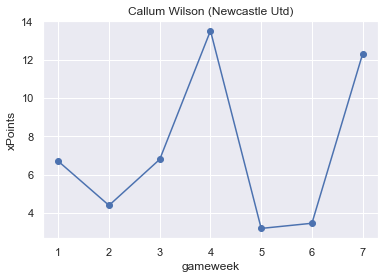

In [19]:
# find player index
name_string = 'Bamf'
playersFound = df[df['web_name'].str.contains(name_string)]
display(playersFound)
# plot xPoints over time
#ix = playersFound.index[0]
ix = 506
plt.plot(game_weeks, df.loc[ix,column_xPoints], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
plt.title(title_string)
plt.xlabel('gameweek')
plt.ylabel('xPoints')
plt.xticks(game_weeks)
plt.show()

## My team

In [15]:
# find player index
df[df['web_name'].str.contains('Pulisi')]

,assists,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,code,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,creativity,creativity_rank,creativity_rank_type,direct_freekicks_order,direct_freekicks_text,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,goals_conceded,goals_scored,ict_index,ict_index_rank,ict_index_rank_type,in_dreamteam,influence,influence_rank,influence_rank_type,minutes,news,news_added,now_cost,own_goals,penalties_missed,penalties_order,penalties_saved,penalties_text,photo,points_per_game,red_cards,saves,second_name,selected_by_percent,special,...,xPoints week 1,xG_week1,goals_week1,xGA_week1,cleansheet_week1,xA_week1,assists_week1,xPoints week 2,xG_week2,goals_week2,xGA_week2,cleansheet_week2,xA_week2,assists_week2,xPoints week 3,xG_week3,goals_week3,xGA_week3,cleansheet_week3,xA_week3,assists_week3,xPoints week 4,xG_week4,goals_week4,xGA_week4,cleansheet_week4,xA_week4,assists_week4,xPoints week 5,xG_week5,goals_week5,xGA_week5,cleansheet_week5,xA_week5,assists_week5,xPoints week 6,xG_week6,goals_week6,xGA_week6,cleansheet_week6,xA_week6,assists_week6,form 5,next1_xP,next5_xP,next10_xP,value,valuePoints metric,xG+xA,xG+xA per game
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
119,0,0,20,50.0,100.0,1,176413,NaN,NaN,0,0,-2,2,14.1,261,149,NaN,NaN,0,3,1.1,2.2,0,Christian,1.7,2,0,11.3,222,102,False,26.4,294,124,173,Hamstring injury - 50% chance of playing,2020-10-31T18:00:12.906132Z,83,0,0,NaN,0,NaN,176413.jpg,2.0,0,0,Pulisic,3.1,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.1,0.0,0.0,0.0,2.910803,0.1,0.0,2.2,0.0,0.1,0.0,2.996585,0.1,0.0,0.7,1.0,0.0,0.0,2.302463,2.610454,2.411616,2.395172,0.289301,0.833467,0.3,0.1


In [16]:
my_starting11 = [363,259,77,239,254,302,119,508,469,506,388]
my_subs = [35,200,146,262]

In [17]:
print('STARTING 11')
display(df.loc[my_starting11, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))
print('\nSUBSTITUTES')
display(df.loc[my_subs, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

STARTING 11


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,
363,McCarthy,Southampton,45,6.923077,3.9,3.442293,4.585858,3.731333,3.748370,1.622712
259,Alexander-Arnold,Liverpool,74,7.037037,2.7,3.784485,4.149245,3.456793,3.701937,1.391204
77,Lamptey,Brighton,47,6.969697,3.3,3.698852,3.458273,4.367576,3.429549,1.706153
239,Justin,Leicester City,48,7.000000,4.0,3.454185,3.083477,4.043620,3.431608,1.576613
254,Salah,Liverpool,124,6.987952,8.3,7.276458,6.536794,6.528464,6.782879,2.066375
302,Fernandes,Manchester Utd,105,6.000000,6.0,5.658153,6.614873,5.117449,5.580971,1.746144
119,Pulisic,Chelsea,83,3.000000,2.0,2.401194,2.302463,2.610454,2.411616,0.833467
508,Rodríguez,Everton,79,6.029412,6.8,6.071648,6.455877,6.896853,6.448052,2.160195
469,Podence,Wolves,55,5.957447,4.7,4.058319,3.729823,3.625029,3.872756,1.730473



SUBSTITUTES


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,
35,Nyland,Aston Villa,40,NaN,0.0,NaN,NaN,NaN,NaN,NaN
200,Dallas,Leeds United,45,6.944444,3.6,2.690571,3.570359,2.996700,2.630206,1.268347
146,Mitchell,Crystal Palace,42,6.000000,2.5,2.576469,1.946242,2.424006,2.747607,1.257188
262,Brewster,Sheffield Utd,45,3.076923,1.3,1.690000,1.733333,1.628117,1.663995,0.796674


## Save data

In [18]:
# save data
filepath = '../data/fpl/data_week' + str(gameweek) + str('.csv')
df.to_csv(filepath)